In [ ]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
from statsmodels.graphics.gofplots import qqplot

In [ ]:
df = pd.read_csv('/content/EFIplus_medit.zip',compression='zip', sep=";")
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
print(df)
df.head(10)
df.info()
print(list(df.columns))


       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [ ]:
df.drop(df.iloc[:,5:15], axis=1, inplace=True)
print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo   
...          ...        ...        ...       ...            ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga   

     Water_source_type Flow_regime  Altitude Geological_typology  \
0              Pluvial   Permanent       199           Siliceous   
1          Groundwater   Permanent      1253          Calca

In [ ]:
# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True"


# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes
# Number of values per variable
df.count()

Site_code                               5011
Latitude                                5011
Longitude                               5011
Country                                 5011
Catchment_name                          5011
Water_source_type                       4712
Flow_regime                             4473
Altitude                                5011
Geological_typology                     5011
Actual_river_slope                      4975
Natural_sediment                        4402
Elevation_mean_catch                    4841
prec_ann_catch                          4841
temp_ann                                4841
temp_jan                                4841
temp_jul                                4841
Barriers_catchment_down                 5011
Barriers_river_segment_up               5009
Barriers_river_segment_down             5009
Barriers_number_river_segment_up        5008
Barriers_number_river_segment_down      5009
Barriers_distance_river_segment_up      4998
Barriers_d

In [ ]:
df.isnull().sum()

Site_code                                  0
Latitude                                   0
Longitude                                  0
Country                                    0
Catchment_name                             0
Water_source_type                        299
Flow_regime                              538
Altitude                                   0
Geological_typology                        0
Actual_river_slope                        36
Natural_sediment                         609
Elevation_mean_catch                     170
prec_ann_catch                           170
temp_ann                                 170
temp_jan                                 170
temp_jul                                 170
Barriers_catchment_down                    0
Barriers_river_segment_up                  2
Barriers_river_segment_down                2
Barriers_number_river_segment_up           3
Barriers_number_river_segment_down         2
Barriers_distance_river_segment_up        13
Barriers_d

In [ ]:

df2 = df.dropna(how='all') # drops rows when all elements are missing values
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB


In [ ]:
df2 = df.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 5.9+ MB


In [ ]:
df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 154 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(35), int64(113), object(6)
memory usage: 3.3+ MB


In [ ]:
print(df['Catchment_name'].mode())

0    Ebro
Name: Catchment_name, dtype: object


In [ ]:
df.describe()

,Latitude,Longitude,Altitude,Actual_river_slope,Natural_sediment,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,5011.000000,5011.000000,5011.000000,4975.000000,4402.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,...,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
mean,41.660286,-4.220392,428.072042,14.582432,3.062017,785.177935,941.823810,13.261950,6.211403,20.604503,...,0.000399,0.085412,0.000599,0.000399,0.012373,0.000200,0.196568,0.068250,0.132708,0.031132
std,1.654641,4.754419,342.912849,22.596125,0.567240,432.725266,292.497317,2.172315,2.662325,2.583101,...,0.019976,0.279522,0.024463,0.019976,0.110554,0.014127,0.397442,0.252199,0.339293,0.173690
min,36.213984,-9.459453,0.000000,0.000000,1.000000,52.249944,373.366940,3.900000,-2.700000,11.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.450919,-7.716600,142.000000,3.509500,3.000000,468.393265,677.473828,12.000000,4.300000,18.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.316060,-6.176062,375.000000,8.000000,3.000000,701.438554,968.898321,13.400000,6.400000,20.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.904789,-1.959129,610.500000,17.170000,3.000000,1049.983330,1168.356822,14.600000,8.300000,22.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.098423,15.625773,1851.000000,774.000000,4.000000,2545.546876,1739.000486,18.300000,12.500000,28.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df2.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,Nival,Permanent,1179,Siliceous,0.001,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,Nival,Permanent,1038,Siliceous,2.258,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,Pluvial,Permanent,636,Siliceous,0.263,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,Pluvial,Permanent,890,Calcareous,2.909,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,Groundwater,Permanent,872,Calcareous,3.530,...,0,0,0,0,0,0,1,0,0,0


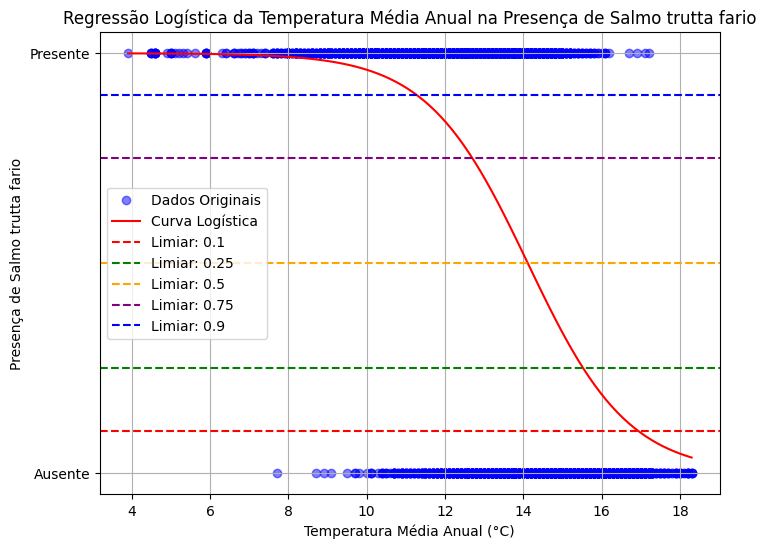

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Carregar os dados do arquivo CSV comprimido
df = pd.read_csv('EFIplus_medit.zip', compression='zip', sep=";")

# Extrair os dados de x e y
x_data = df[['temp_ann']]
y_data = df['Salmo trutta fario']

# Lidar com valores ausentes usando SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_data_imputed = imputer.fit_transform(x_data)

# Realizar regressão logística com dados imputados
log_reg = LogisticRegression()
log_reg.fit(x_data_imputed, y_data)

# Gerar pontos de dados para a curva logística
x_fit = np.linspace(min(x_data_imputed.flatten()), max(x_data_imputed.flatten()), 100).reshape(-1, 1)
y_fit = log_reg.predict_proba(x_fit)[:, 1]

# Plotar os dados originais e a curva logística
plt.figure(figsize=(8, 6))
plt.scatter(df['temp_ann'], df['Salmo trutta fario'], color='blue', alpha=0.5, label='Dados Originais')
plt.plot(x_fit, y_fit, color='red', label='Curva Logística')

# Adicionar limiares
thresholds = [0.1, 0.25, 0.5, 0.75, 0.9]
cores = ['red', 'green', 'orange', 'purple', 'blue']
for limite, cor in zip(thresholds, cores):
    plt.axhline(y=limite, color=cor, linestyle='--', label=f'Limiar: {limite}')

plt.title('Logistic Regression of Mean Annual Temperature on Presence of Salmo trutta fario.')
plt.xlabel('Temperatura Média Anual (°C)')
plt.ylabel('Presença de Salmo trutta fario')
plt.yticks([0, 1], ['Ausente', 'Presente'])

plt.legend()
plt.grid(True)
plt.show()


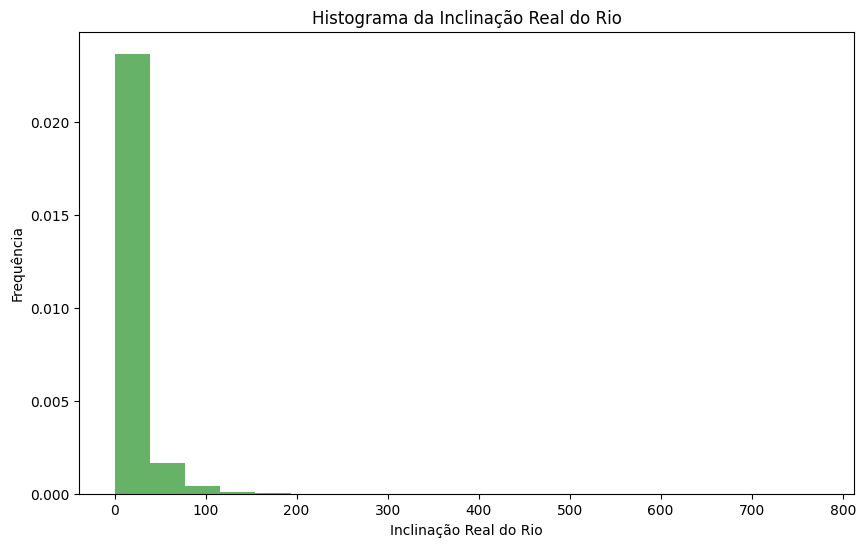

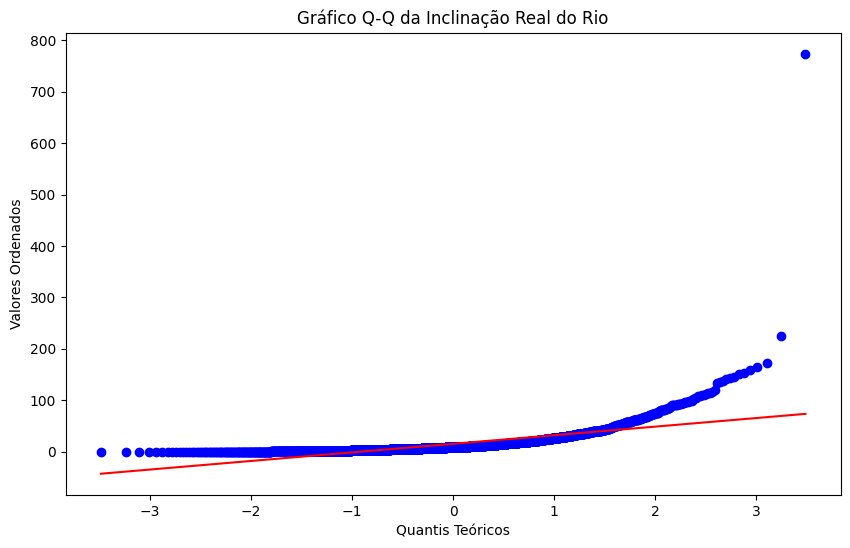

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Suponha que df seja seu DataFrame contendo os dados 'actual_river_slope'
actual_river_slope = df2['Actual_river_slope']

# Visualização - Histograma
plt.figure(figsize=(10, 6))
plt.hist(actual_river_slope, bins=20, density=True, alpha=0.6, color='g')
plt.title('Histograma da Inclinação Real do Rio')
plt.xlabel('Inclinação Real do Rio')
plt.ylabel('Frequência')

# Visualização - Gráfico Q-Q
plt.figure(figsize=(10, 6))
stats.probplot(actual_river_slope, dist="norm", plot=plt)
plt.title('Gráfico Q-Q da Inclinação Real do Rio')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.show()


In [ ]:
# Teste de Shapiro-Wilk
shapiro_test_statistic, shapiro_p_value = stats.shapiro(actual_river_slope)
print("Estatística do Teste de Shapiro-Wilk:", shapiro_test_statistic)
print("Valor-p do Teste de Shapiro-Wilk:", shapiro_p_value)

nível_de_significância = 0.05  # Nível de significância

if shapiro_p_value > nível_de_significância:
    print("Os dados parecem ser provenientes de uma distribuição normal (não rejeitamos H0)")
else:
    print("Os dados não parecem ser provenientes de uma distribuição normal (rejeitamos H0)")


Estatística do Teste de Shapiro-Wilk: 0.4802039861679077
Valor-p do Teste de Shapiro-Wilk: 0.0
Os dados não parecem ser provenientes de uma distribuição normal (rejeitamos H0)


Estatística do Teste de Shapiro-Wilk: 0.9866129159927368
Valor-p do Teste de Shapiro-Wilk: 0.4121244251728058


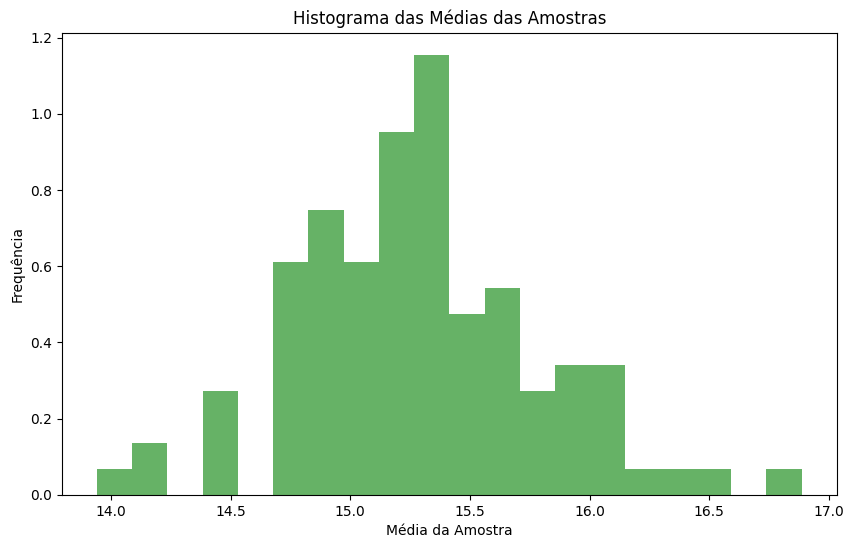

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Supondo que df2 seja o DataFrame contendo os dados 'Actual_river_slope'
actual_river_slope = df2['Actual_river_slope']

# Passo 1: Gerar 100 amostras de 2000 observações cada com reposição
amostras_medias = []
num_amostras = 100
tamanho_amostra = 2000

for _ in range(num_amostras):
    amostra = np.random.choice(actual_river_slope, size=tamanho_amostra, replace=True)
    media_amostral = np.mean(amostra)
    amostras_medias.append(media_amostral)

# Passo 2: Plotar o histograma das médias das amostras
plt.figure(figsize=(10, 6))
plt.hist(amostras_medias, bins=20, density=True, alpha=0.6, color='g')
plt.title('Histograma das Médias das Amostras')
plt.xlabel('Média da Amostra')
plt.ylabel('Frequência')

# Passo 3: Testar se as médias das amostras são provenientes de uma distribuição normal
estatistica_teste_shapiro, p_valeu_teste_shapiro = stats.shapiro(amostras_medias)
print("Estatística do Teste de Shapiro-Wilk:", estatistica_teste_shapiro)
print("P_valeu do Teste de Shapiro-Wilk:", p_valeu_teste_shapiro)

nível_de_significância = 0.05  # Nível de significância

